In [1]:
import os
import pandas as pd
import hdbscan
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils import z_score_normalize, get_txt_file_in_df

In [9]:
def get_datasets(base_folder: str = "datasets/2d_txt") -> list[str]:
    datasets = []
    for dataset in os.listdir(base_folder):
        path = f"{base_folder}{dataset}"
        if not os.path.isdir(path):
            datasets.append(path)

    return datasets

In [10]:
datasets = get_datasets("datasets/")
datasets

['datasets/toy2.csv', 'datasets/toy.csv']

In [32]:
for dataset in datasets:
    df = get_file_in_df(dataset)
    name = dataset.split("/")[-1].replace(".txt", ".csv")
    df.to_csv(f"datasets/csv_files/{name}")

Print dataset without Noises

In [ ]:
for dataset in datasets:
    df = get_file_in_df(dataset)
    print_dataset(df, dataset.split("/")[-1])
    print(df.describe())

Print datasets with noises

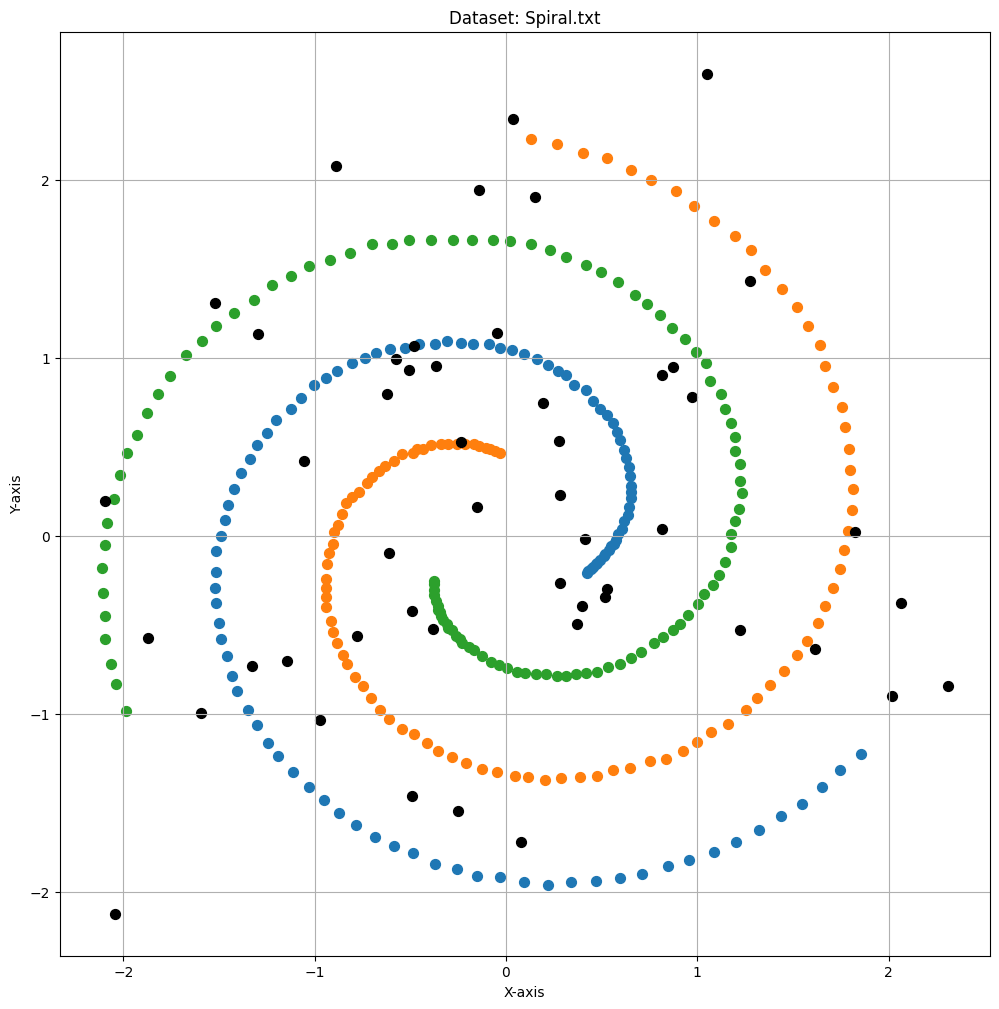

                x           y
count  362.000000  362.000000
mean    -0.004231    0.023552
std      1.008001    1.010363
min     -2.110731   -2.121355
25%     -0.744278   -0.716404
50%     -0.028517   -0.018215
75%      0.671833    0.794394
max      2.308026    2.594647


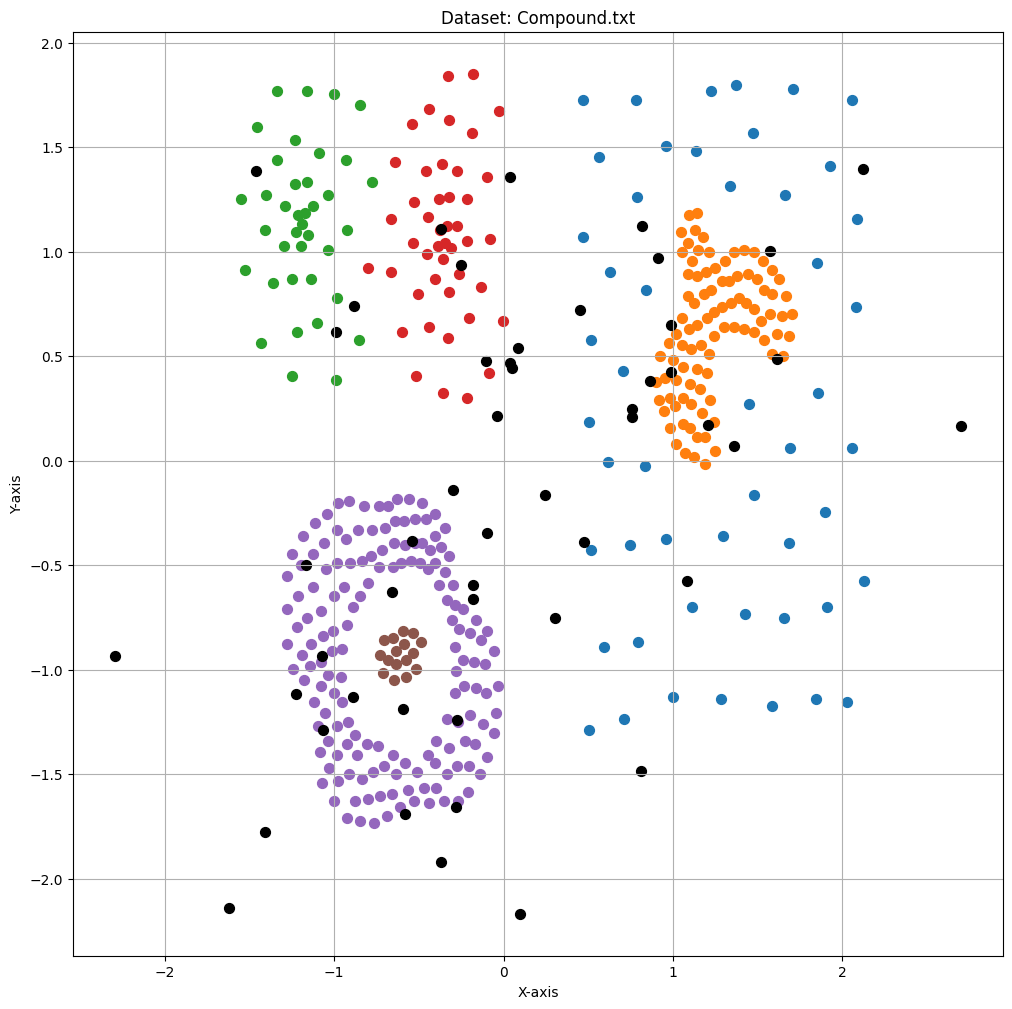

                x           y
count  449.000000  449.000000
mean     0.003175   -0.021162
std      0.999665    1.000013
min     -2.292529   -2.167650
25%     -0.823174   -0.889778
50%     -0.319926    0.037804
75%      1.051168    0.870519
max      2.697308    1.850805


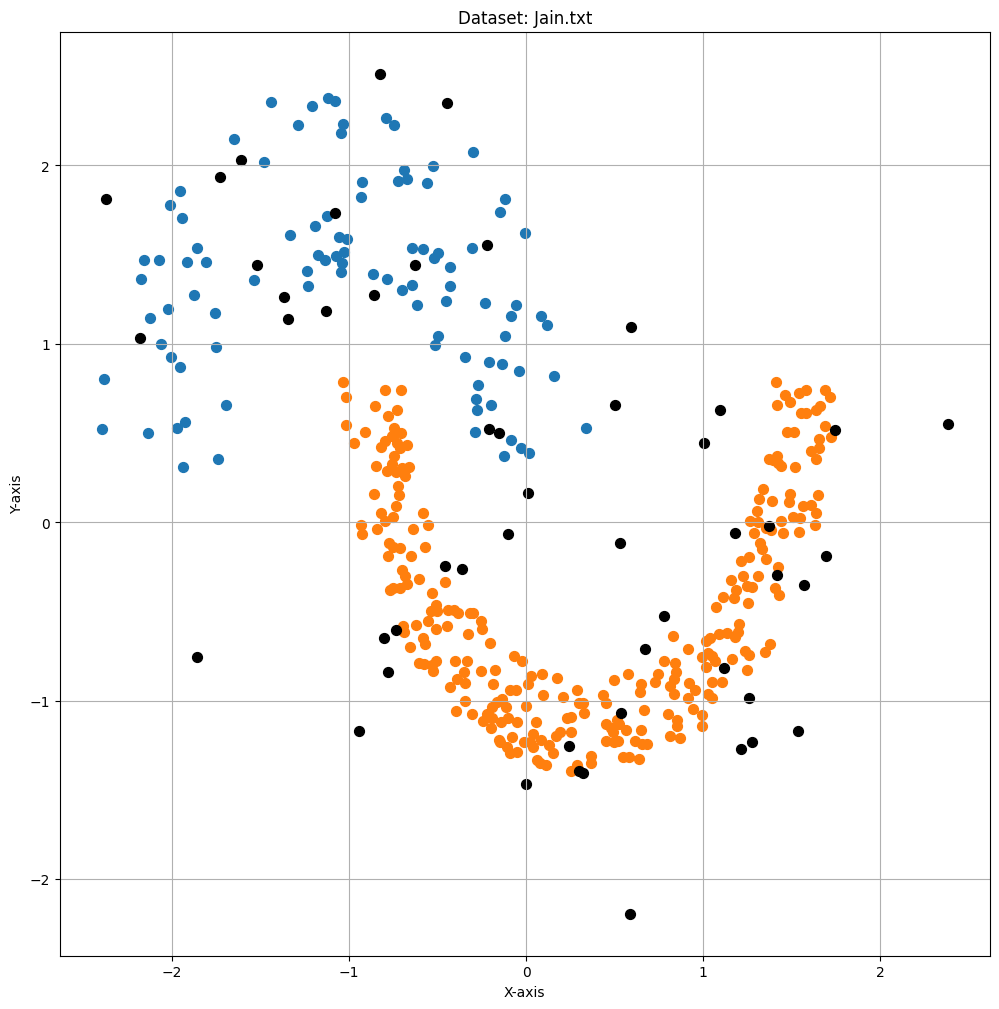

                x           y
count  423.000000  423.000000
mean     0.002896    0.015808
std      1.018346    1.020076
min     -2.393160   -2.192790
25%     -0.713532   -0.877464
50%     -0.114752   -0.112935
75%      0.917889    0.697011
max      2.378844    2.514173


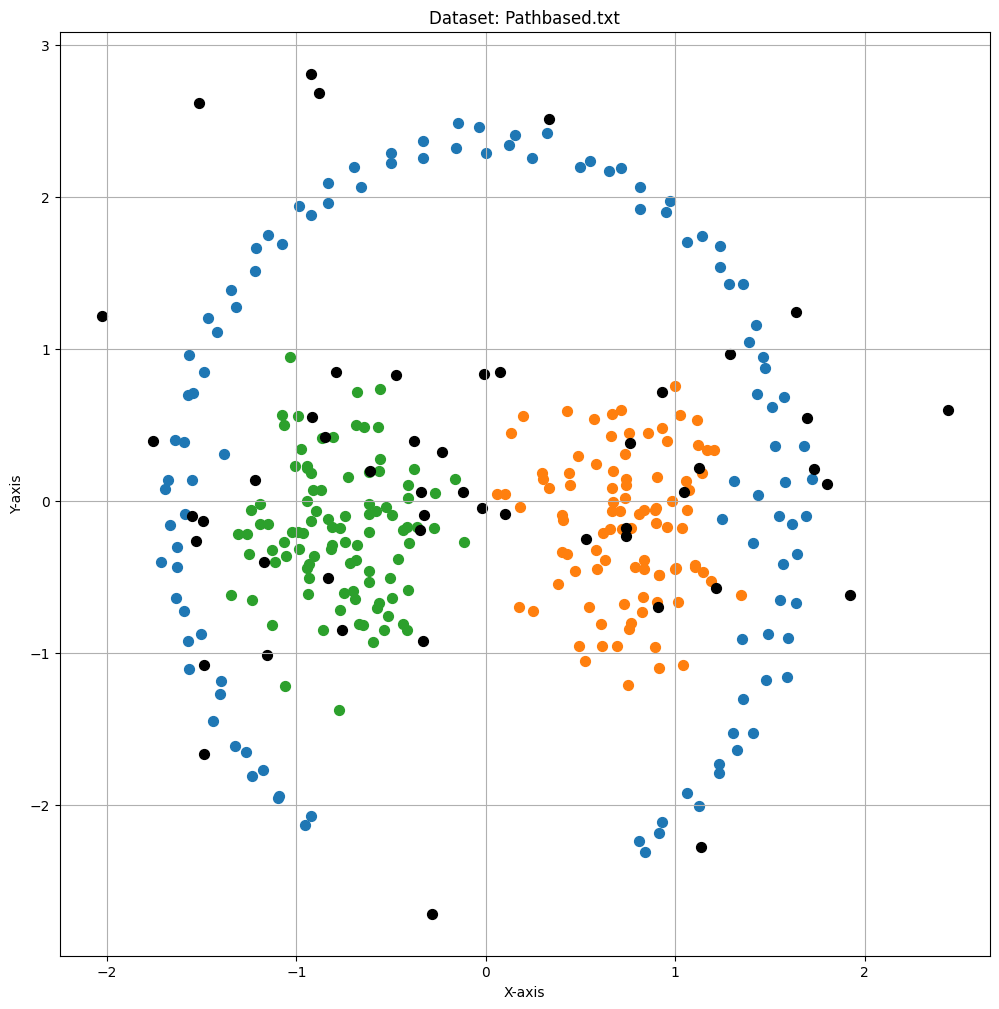

                x           y
count  350.000000  350.000000
mean    -0.010471    0.022508
std      1.019119    1.011820
min     -2.025898   -2.716358
25%     -0.916304   -0.542354
50%     -0.117030   -0.090695
75%      0.897042    0.426745
max      2.436939    2.810398


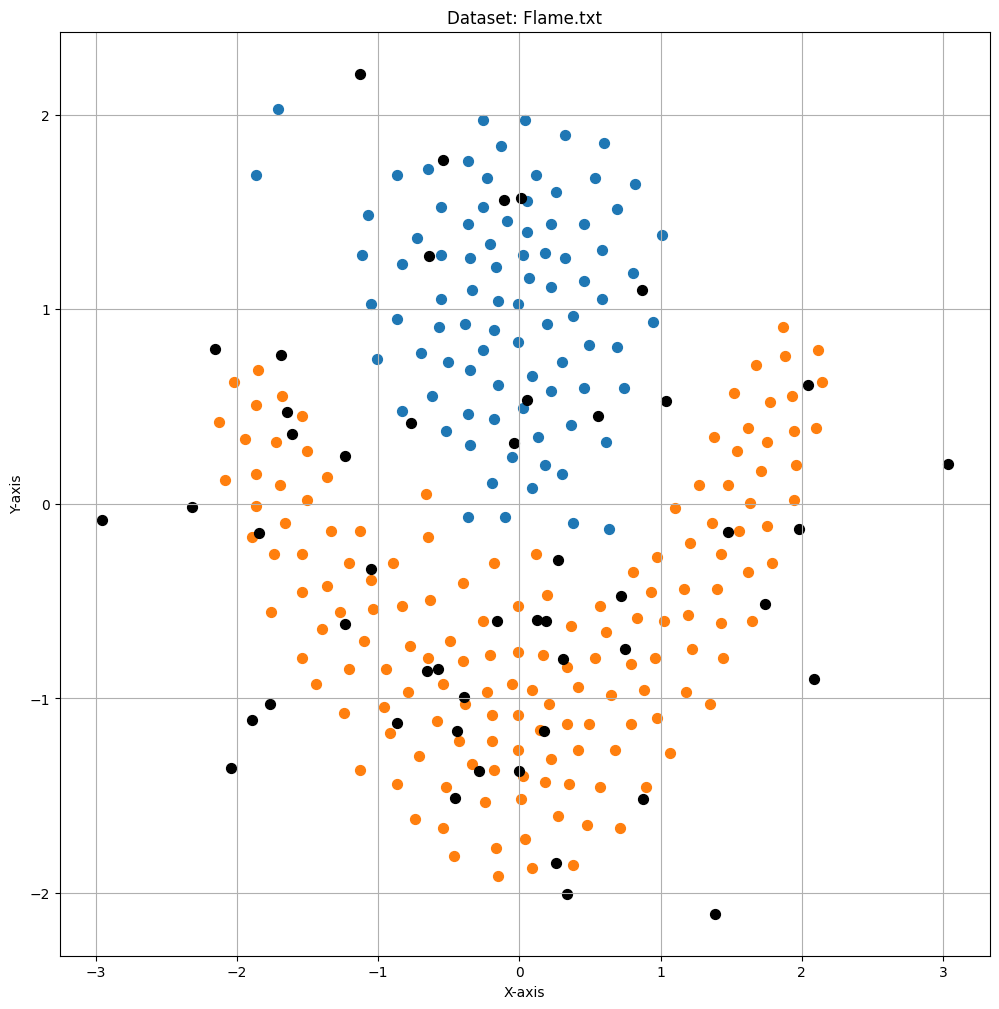

                x           y
count  290.000000  290.000000
mean    -0.035166   -0.045480
std      1.055462    1.005649
min     -2.956209   -2.106730
25%     -0.686571   -0.850169
50%     -0.007416   -0.104493
75%      0.617094    0.726773
max      3.032895    2.211485


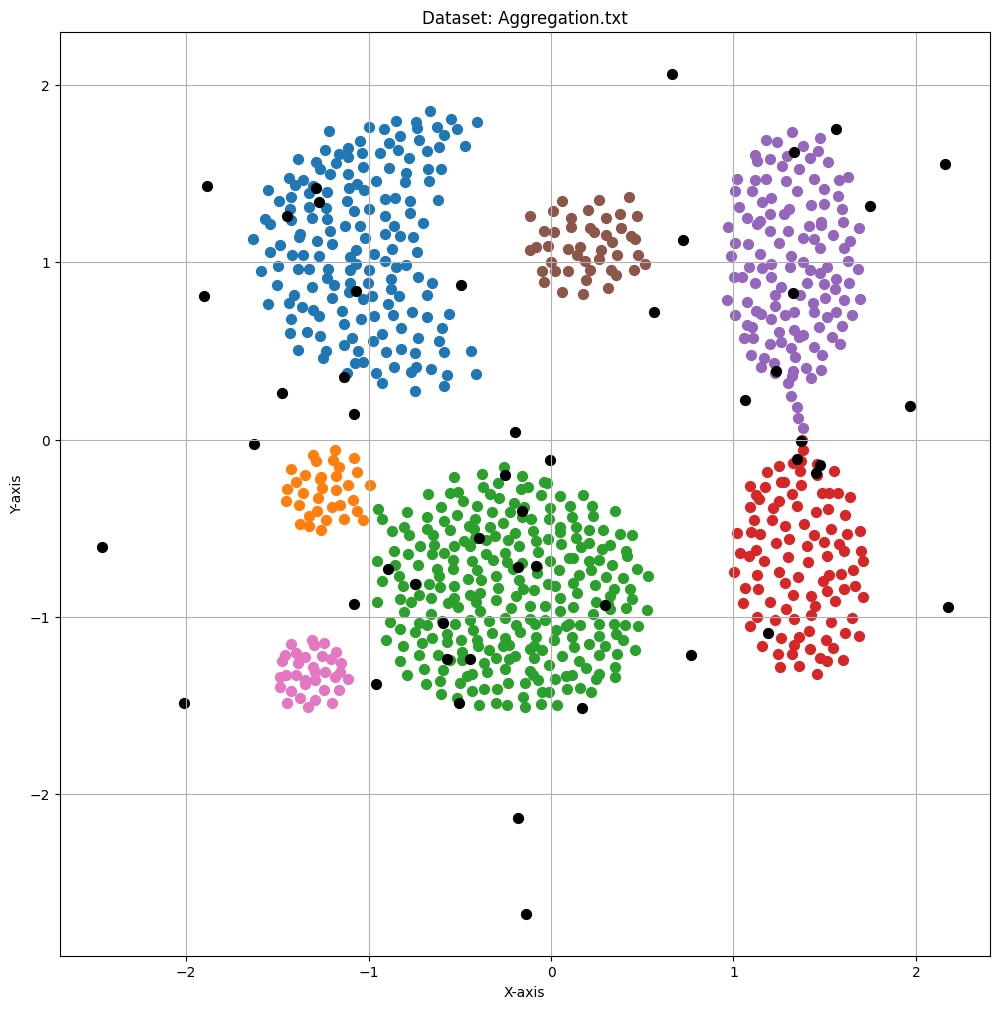

                x           y
count  838.000000  838.000000
mean    -0.002307   -0.004856
std      1.013417    1.005629
min     -2.460731   -2.673708
25%     -0.853334   -0.891168
50%     -0.145314   -0.299364
75%      1.122066    0.961501
max      2.173239    2.062892


In [76]:
for dataset in datasets:
    name = dataset.split("/")[-1].replace(".txt", "_with_noise.csv")
    df = get_file_in_df(dataset)
    df_with_noise = add_new_noise_points(df, num_points=50, noise_std=0.6)
    df_with_noise.to_csv(f"datasets/csv_with_noise/{name}", index=False)
    print_dataset(df_with_noise, dataset.split("/")[-1])
    print(df_with_noise.describe())

In [25]:
def print_data_hdbscan(data, k, name):
    clusterer = hdbscan.HDBSCAN(
        alpha=1.0, 
        approx_min_span_tree=False,
        gen_min_span_tree=True,
        metric='euclidean', 
        min_cluster_size=k, 
        min_samples=k,
        allow_single_cluster=False,
        match_reference_implementation=True)
    clusterer.fit(data)
    mst = clusterer.single_linkage_tree_.to_numpy()
    mst_weight = sum([x[2] for x in mst])
    # print("MST weight: ", mst_weight) # Should be 30.83044942

    # Step 3. Plot the data and the outlier scores
    outlier_scores = clusterer.outlier_scores_
    plt.figure(figsize=[12,12])
    plt.scatter([x[0] for x in data], [x[1] for x in data], s=25, c=outlier_scores, cmap='viridis')
    plt.colorbar()

    # Print outlier scores
    # for (i, score) in enumerate(outlier_scores):
    #     print(f"Outlier {i+1} score: {score}")

    # Step 4: Assign rankings and plot top outliers
    indices = [i for i in range(len(outlier_scores))]
    indices.sort(key=lambda x: outlier_scores[x])
    ranks = indices[-30:]
    ranks = reversed(ranks)
    for i, idx in enumerate(ranks):
        plt.text(data[idx][0], data[idx][1], str(i+1), fontsize=10, color='black')
    plt.title(name)

    plt.axis('equal')
    plt.show()

/home/shukurillo/lab/auto-glosh/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/shukurillo/lab/auto-glosh/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


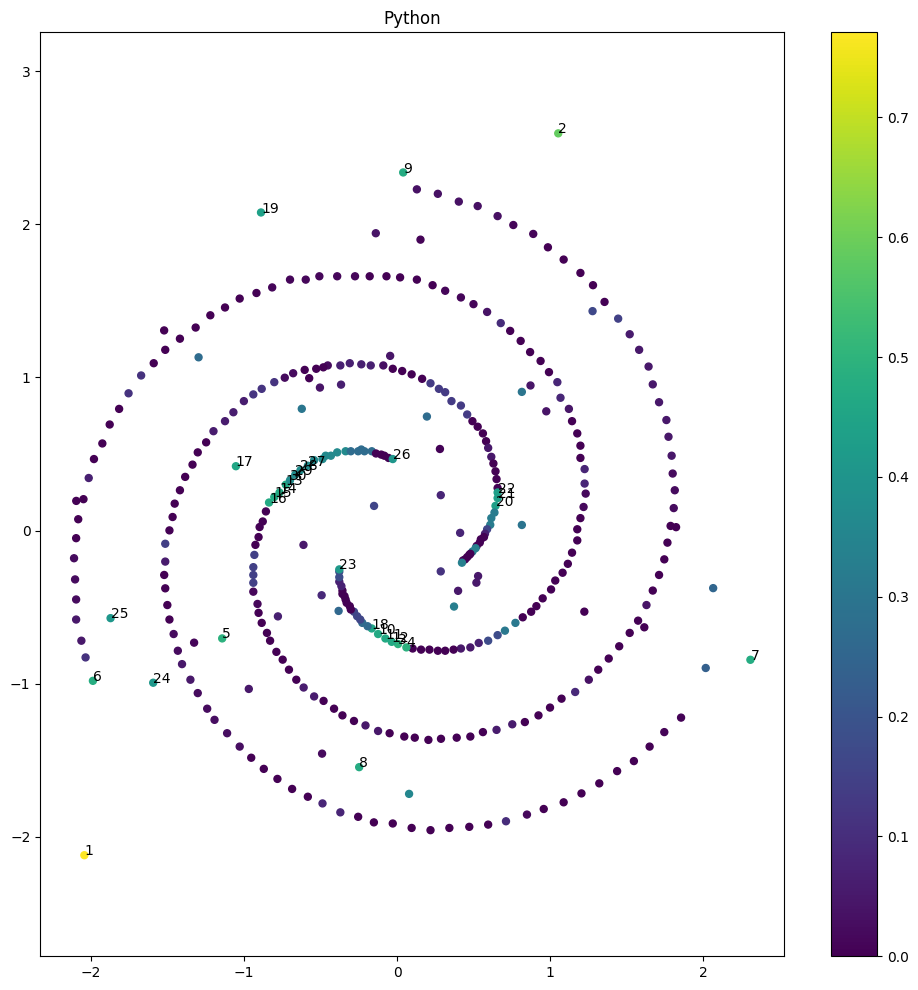

In [27]:
# for dataset in datasets:
#     name = dataset.split("/")[-1]
#     df = get_file_in_df(dataset)
#     df = df.drop(columns=["cluster"])
#     data = df.to_numpy()
#     # .tolist()
#     # print(data)
#     print_data_hdbscan(data, 10, name, match_ref=True)

# for dataset in ["Spiral_with_noise.csv"]: # os.listdir("datasets/csv_with_noise"):
#     path = f"datasets/csv_with_noise/{dataset}"
#     df = pd.read_csv(path)
#     df = df.drop(columns=["cluster"])
#     data = df.to_numpy().tolist()
#     # .tolist()
#     # print(data)
#     print_data_hdbscan(data, 2, name, match_ref=True)

path = f"datasets/csv_with_noise/Spiral_with_noise.csv"
df = pd.read_csv(path)
df = df.drop(columns=["cluster"])
data = df.to_numpy().tolist()
print_data_hdbscan(data, 3, "Python")

In [12]:
def print_data_hdbscan_rust(data: np.array, outlier_scores: np.array, name):

    # Step 3. Plot the data and the outlier scores
    plt.figure(figsize=[12,12])
    plt.scatter([x[0] for x in data], [x[1] for x in data], s=25, c=outlier_scores, cmap='viridis')
    plt.colorbar()

    # Print outlier scores
    # for (i, score) in enumerate(outlier_scores):
    #     print(f"Outlier {i+1} score: {score}")

    # Step 4: Assign rankings and plot top outliers
    indices = [i for i in range(len(outlier_scores))]
    indices.sort(key=lambda x: outlier_scores[x])
    ranks = indices[-30:]
    ranks = reversed(ranks)
    for i, idx in enumerate(ranks):
        plt.text(data[idx][0], data[idx][1], str(i+1), fontsize=10, color='black')
    plt.title(name)

    plt.axis('equal')
    plt.show()

[[1.8550642792940544, -1.222430224508933], [1.7454740864888103, -1.317082630644668], [1.649582667784222, -1.4117350367804036], [1.5468418620293056, -1.506387442916139], [1.4372516692240616, -1.5719160317793404], [1.3208120893684905, -1.6520065292788089], [1.2043725095129183, -1.7175351181420102], [1.087932929657347, -1.7757827526870784], [0.9577945757011194, -1.8194684785958797], [0.8482043828958757, -1.855873250186547], [0.7112166418893208, -1.899558976095348], [0.5947770620337489, -1.9214018390497485], [0.4714880951278496, -1.9359637476860152], [0.341349741171622, -1.9432447020041488], [0.2180607742657227, -1.957806610640416], [0.0947718073598234, -1.9432447020041488], [-0.0285171595460762, -1.914120884731615], [-0.1518061264519755, -1.906839930413481], [-0.2545469322068917, -1.8704351588228136], [-0.3709865120624636, -1.84131134155028], [-0.4874260919180353, -1.783063707005212], [-0.5833175106226237, -1.7393779810964107], [-0.6860583163775399, -1.6884113008694763], [-0.7819497350821

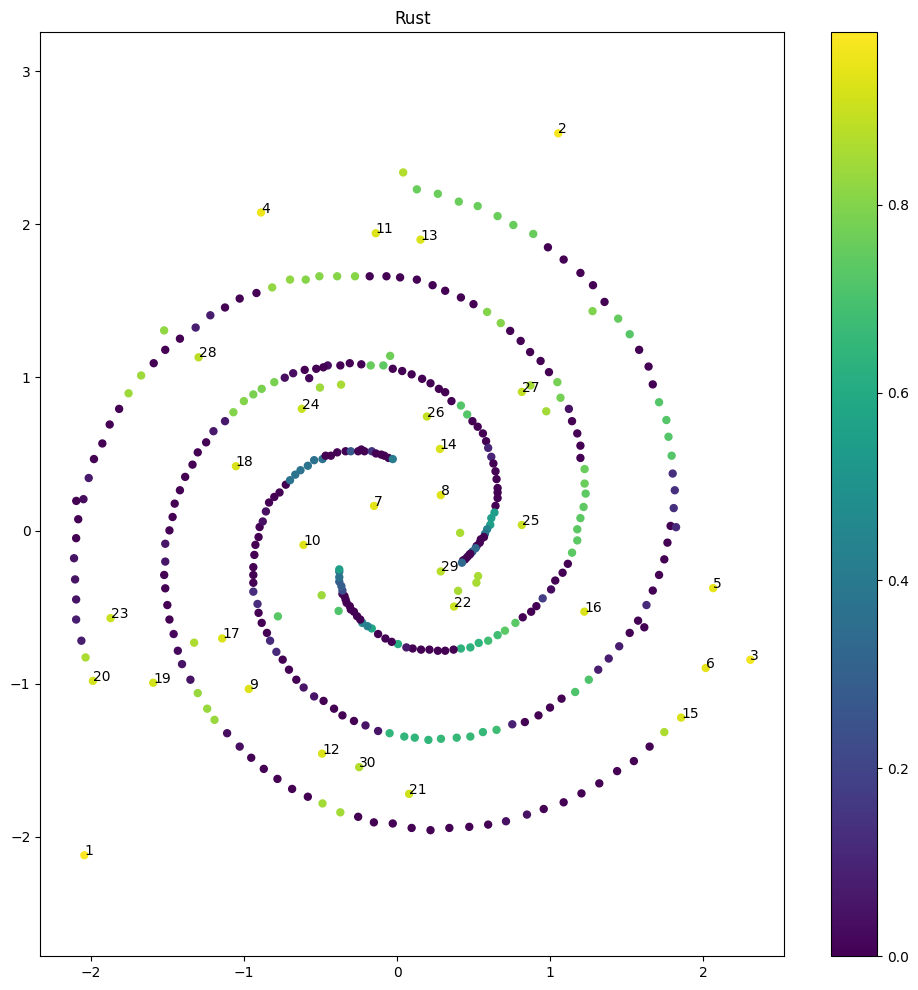

In [29]:
path = f"datasets/csv_with_noise/Spiral_with_noise.csv"
df = pd.read_csv(path)
df = df.drop(columns=["cluster"])
data = df.to_numpy().tolist()
# mpts = 2 rust_glosh_scores = [0.9309680179047589, 0.0, 0.0, 0.0, 0.0, 0.02556773395795188, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04571508095548003, 0.0, 0.0, 2.2052751911695244e-16, 0.1174365833725662, 0.0, 0.0, 0.09186832706071853, 0.0, 0.0, 0.081212502858144, 0.05228290679965116, 0.0457959541570375, 0.0, 0.0, 0.9166666666666689, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02942288494641813, 0.0, 0.0, 6.227162117948429e-16, 0.0, 0.0, 0.03415574483862528, 0.01466630062486276, 0.0, 0.0, 0.057593459491158974, 0.0849044485862376, 0.019353535679702456, 0.0, 0.0, 0.020171957336029115, 0.0, 0.0, 0.12928974281432223, 0.0, 0.0, 0.16626059997723072, 0.0, 0.0, 0.0, 0.33620394349163885, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03148127259434308, 0.0, 0.0, 0.03148127259435005, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17521786330122466, 0.0, 0.0, 0.16686631189886328, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20000000000000295, 0.7739382342677175, 0.0, 0.0, 0.7195432922878644, 0.6894074576082327, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5000000000000164, 0.0, 0.0, 0.22403934813774037, 0.0, 0.0, 0.03596963336849367, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004169708067679177, 0.0, 0.0, 0.0, 0.8280158123448076, 0.0, 0.0, 0.0, 0.0, 0.031230755107756046, 0.0, 0.0, 0.05678295686385574, 0.0, 0.0, 0.056782956863851444, 0.0, 0.6693426965892498, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3862456019154946, 0.1462990089466224, 0.10000000000000313, 0.0, 0.0, 0.15838320114907464, 0.04484440925660304, 0.0, 0.0, 0.0, 0.0, 0.0335270125631119, 0.0, 0.0, 0.023945680517908585, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15356049266886673, 0.0, 0.0, 0.0, 0.0, 0.1459895444250602, 0.0, 0.0, 0.12500000000000147, 2.353910286068651e-15, 0.0, 0.0, 0.16593324316824454, 0.0, 0.0, 0.0, 0.0, 0.27215250004778146, 0.10054729532093426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12433163552701995, 0.35563742981036706, 0.0, 0.0, 0.0021424170176003853, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9091250142156337, 0.0, 0.0, 0.0, 0.0, 0.001362897652269181, 0.6318530404607474, 0.6104521851578169, 0.5973460111931337, 0.0, 0.0988805967210787, 0.0, 0.0, 2.1160617247709545e-16, 0.0, 0.0, 0.0, 0.0, 0.005282716190318468, 0.0, 0.1308169613955211, 0.0, 0.0, 0.032100358100420584, 0.0, 0.0, 0.10763764929892342, 0.0, 0.0, 0.8749402165970618, 0.0, 0.0, 0.0, 0.0, 0.1752833725559984, 0.0, 0.0, 0.0, 0.0, 0.09274868047833995, 0.0, 0.0, 0.15619672923268216, 0.0, 0.0, 0.0, 0.0, 0.14629544493955435, 0.0, 0.0, 0.059149681867371226, 0.02867789203690489, 0.0, 0.0, 0.0, 0.0, 0.037592247247003496, 0.037592247247001165, 0.0, 0.0, 0.17256321364844132, 0.0, 0.0, 0.0, 0.0, 0.23658938981744015, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7701032212351288, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06318234584326955, 0.7347647869289831, 0.0, 0.0, 0.0, 0.0, 0.1402476382544605, 0.0910568333547268, 0.0, 0.0, 0.12663816902334005, 0.12663816902333477, 0.0, 0.0, 0.08470613207862715, 0.3317611722511923, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9203697463958977, 0.0, 0.9472682997011571, 0.8865947025634242, 0.9444654873040933, 0.9274636749157305, 0.8089633280252739, 0.9656449428077525, 0.013712299796662532, 0.0, 0.9638946849850792, 0.9725252649762509, 0.9554078207419862, 0.9353189192240955, 0.86976475732277, 0.9332539661514296, 0.9452135538733918, 0.0, 0.8045641167928037, 0.9562265422922153, 0.0, 0.9442901122612272, 0.0, 0.9491335579169581, 0.9850115814223812, 0.0, 0.0, 0.0, 0.0, 0.95474355902674, 0.9912356702075102, 0.0, 0.9694759673693378, 0.946137016723222, 0.0, 0.9154000281871285, 0.0, 0.8930982708892096, 0.9157837119974567, 0.0, 0.9599010974884526, 0.8926792290543087, 0.0, 0.0, 0.0, 0.979084604070223, 0.9648085254032097, 0.9647335951121914, 0.0]
rust_glosh_scores = [0.9284419315526368, 0.861936035809513, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0452747464611794, 0.0452747464611794, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8464418293182803, 0.8464418293182803, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03178659509904404, 0.03178659509904404, 0.8333333333333318, 0.8321690725892197, 0.8321690725892197, 0.04888775396332716, 0.04888775396332716, 0.022454008767976843, 0.022454008767976843, 0.0, 0.0, 0.0, 0.0, 0.055154059801012886, 0.055154059801012886, 0.0, 0.0, 0.0, 5.000992161963148e-15, 5.000992161963148e-15, 0.0, 0.0, 0.0, 0.06517545537408737, 0.06517545537408737, 0.799999999999998, 0.799999999999998, 0.7852124766034525, 0.7852124766034525, 0.7852124766034525, 0.03507380052612442, 0.03507380052612442, 0.0, 0.0, 0.03507380052611958, 0.0, 0.0, 0.0, 0.7567587876463925, 0.7395295146455311, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.71954329228785, 0.71954329228785, 1.1832543610206815e-15, 0.0, 0.0, 0.0, 0.10129202533481423, 0.10129202533481423, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5478764685354193, 0.5478764685354147, 0.5478764685354147, 0.4390865845757092, 0.3788149152164439, 0.0, 0.0, 0.0, 0.0, 0.3333333333333263, 0.33333333333332477, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333256, 0.7604546733076295, 0.7604546733076295, 0.7604546733076295, 0.759704059332409, 0.759704059332409, 0.7544354554501337, 0.7544354554501337, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7515307299207866, 0.7237809159421404, 0.0, 0.0, 0.0, 0.7220711219701965, 0.7220711219701965, 0.7209509290598822, 0.7209509290598822, 0.13548129524948566, 0.13548129524948566, 0.13548129524948566, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11631372817690255, 0.0, 0.0, 0.07883172164298378, 0.07883172164298378, 0.07883172164298378, 0.7076509164956446, 0.7076509164956446, 0.0, 0.0, 0.0, 0.0, 0.09007926735615034, 0.6787854885686947, 0.6600692025099157, 0.6600692025099157, 0.6600692025099157, 0.6600692025099157, 0.6439942722500608, 0.6439942722500608, 0.6439942722500608, 0.6439942722500608, 0.05026276997360671, 0.05026276997360671, 0.0, 0.0, 0.0, 0.0, 0.05045422438503272, 0.05045422438503272, 0.0, 0.0, 0.0, 0.11564697034380902, 0.11564697034380902, 0.0, 0.0, 0.0, 0.12651191476712967, 0.12651191476712967, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.040614316784236305, 0.040614316784236305, 0.0, 0.0, 0.0, 0.0, 0.3758718490520106, 0.3758718490520106, 0.3758718490520106, 0.3758718490520106, 0.3665984849595256, 0.3665984849595256, 0.0, 0.0, 0.0, 0.0, 0.2697500239861804, 0.0, 0.0, 0.14285714285713466, 0.0, 0.0, 0.0, 0.0, 0.40645204684483993, 0.9160643926646476, 0.8571428571428562, 0.07538206584896011, 0.07538206584896011, 0.048635783318249096, 0.048635783318249096, 0.048635783318249096, 0.0, 0.0, 0.02721665765548635, 0.06859879131129683, 0.0, 0.0, 0.0, 0.0, 0.8394384218746328, 0.8394384218746328, 0.0, 0.0, 0.0, 0.08295108161262499, 0.07571676835689684, 0.0, 0.0, 0.0, 0.8199007251516102, 0.8199007251516102, 0.8034037288801374, 0.8034037288801374, 0.8034037288801374, 0.8034037288801367, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8009781793498032, 0.8009781793498032, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7798543560877443, 0.7798543560877443, 0.044109562732701176, 0.0, 0.0, 0.0, 0.0, 0.7581510270585057, 0.7581510270585057, 0.7411590961337435, 0.7411590961337435, 0.7371965134575859, 0.7371965134575859, 0.7371965134575859, 0.7371965134575859, 0.0, 0.0, 0.0, 0.02722105962732001, 0.17737105372087308, 0.0, 0.0, 0.0, 0.7318723821204962, 0.7318723821204962, 0.6802473494030219, 0.6802473494030219, 0.6385980511255228, 0.6312149370863691, 0.6312149370863691, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06291990299829112, 0.6119296897114531, 0.0, 0.0, 0.0, 0.5830453848505605, 0.4364418014934246, 0.4364418014934246, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23486600393157556, 0.2887425775306838, 0.2887425775306838, 0.3711926703521133, 0.3711926703521133, 0.5508519073943655, 0.8877244532623456, 0.8564519432852592, 0.9293915947908142, 0.8986092104175013, 0.8459690102305649, 0.9286674685404744, 0.858853251159693, 0.7275943591180427, 0.9316497951568449, 0.8683041432635088, 0.8539519466608684, 0.9337363497042508, 0.9460375065024124, 0.9180425424768236, 0.9050331994524483, 0.767465004264446, 0.8765853239366592, 0.902872731212762, 0.11657117858449784, 0.7114265810430244, 0.9284623462146376, 0.0, 0.9281642277574483, 0.9621059872799078, 0.9022241922112159, 0.970173129211311, 0.8463086765959735, 0.012741048905775983, 0.9064622477231252, 0.0, 0.9104135775396103, 0.9835220755155791, 0.8199010631688692, 0.9393548335524964, 0.9279189525321284, 0.8687026366098515, 0.8828192359468996, 0.8539519466608684, 0.8357019634423235, 0.8622406812474043, 0.8539519466608684, 0.9246060344281966, 0.8402757164575919, 0.944775589218757, 0.7933432156280379, 0.0, 0.959623255456986, 0.9310036023801358, 0.9315128251575354, 0.0]
print(data)
print_data_hdbscan_rust(data, rust_glosh_scores, "Rust")

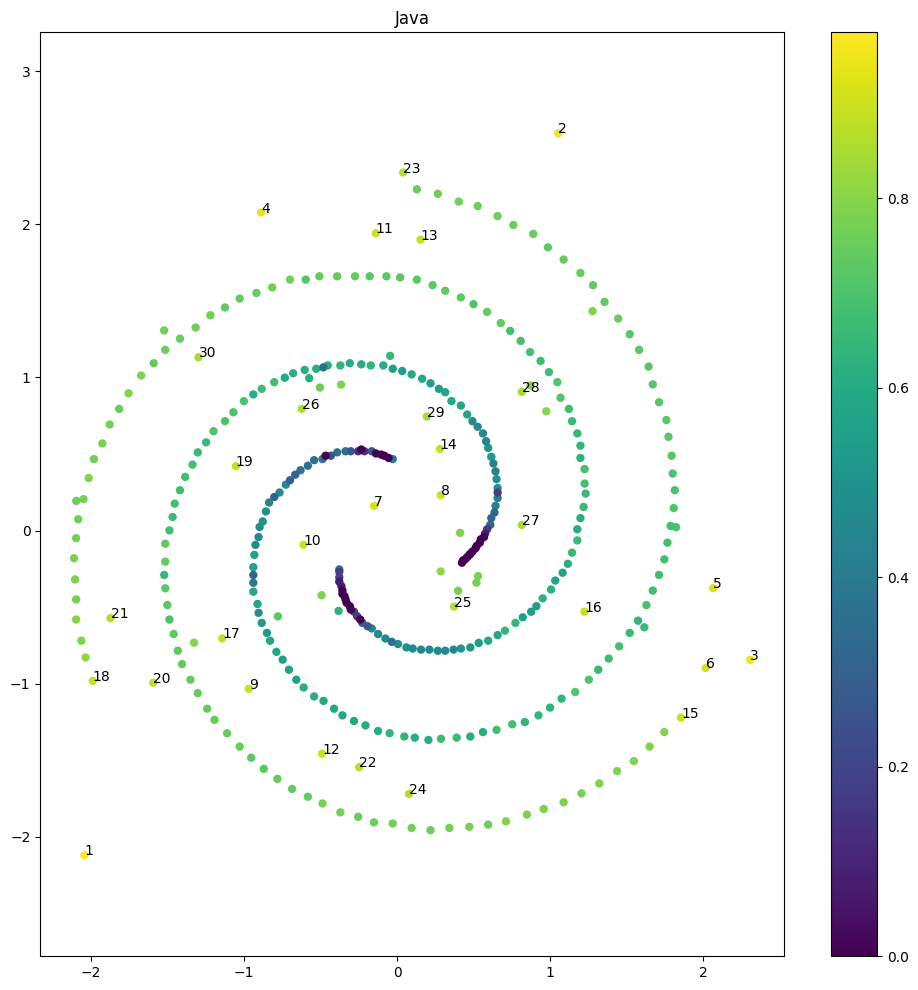

In [23]:
def get_java_data(path: str = "out/GLOSH score Order.txt"):
    data = []
    gl_scores = []
    with open(path, "r") as file:
        for line in file:
            vals = line.split(" ")
            x, y = map(float, vals[1:3])
            gl_score = float(vals[-1].split("=")[-1])
            data.append([x, y])
            gl_scores.append(gl_score)


    return data, gl_scores
data, gl_scores = get_java_data()
print_data_hdbscan_rust(data, gl_scores, "Java")